In [19]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np
import json
from  tensorflow import keras
from tensorflow.keras import layers

In [3]:
def normalize(row):
    word = row["word"]
    strokes = row["drawing"]

    stroke_lengths = [len(stroke[0]) for stroke in strokes]
    total_points = sum(stroke_lengths)
    arr_strokes = np.zeros((total_points, 3), dtype=np.float32)
    current_t = 0

    for stroke in strokes:
        for i in [0, 1]:
            arr_strokes[current_t:(current_t + len(stroke[0])), i] = stroke[i]
        current_t += len(stroke[0])
        arr_strokes[current_t - 1, 2] = 1  # stroke_end

    lower = np.min(arr_strokes[:, 0:2], axis=0)
    upper = np.max(arr_strokes[:, 0:2], axis=0)
    scale = upper - lower
    scale[scale == 0] = 1
    arr_strokes[:, 0:2] = (arr_strokes[:, 0:2] - lower) / scale

    arr_strokes[1:, 0:2] -= arr_strokes[0:-1, 0:2]
    arr_strokes = arr_strokes[1:, :]
    return arr_strokes, word


In [4]:
anvil = './draw_data/anvil.ndjson'
df = pd.read_json(anvil, lines=True)

# Apply the parsing function to each row using df.apply
result = df.apply(normalize, axis=1)

# # Process the results if needed
# data_x = np.empty((0, 100, 3), float)
# ctr = 0

result_df = result.to_frame()
result_df['name'] = result_df[0].apply(lambda x: x[1])
result_df  = result_df.rename(columns = {0 : 'Strokes'})
result_df.Strokes = result_df.Strokes.apply(lambda x: x[0].tolist())
max_length = result_df.Strokes.apply(len).max()
padded_strokes = result_df.Strokes.apply(lambda x: x + [(0, 0, 0)] * (max_length - len(x)))


In [1]:
padded_strokes

NameError: name 'padded_strokes' is not defined

In [139]:
padded_strokes[0]

0         [[0.020504087209701538, -0.010559380054473877,...
1         [[-0.0029368577525019646, 0.02127659320831299,...
2         [[0.0, 0.020527860149741173, 0.0], [0.0, 0.014...
3         [[0.015000000596046448, -0.0058650970458984375...
4         [[0.01807228848338127, -0.004975123330950737, ...
                                ...                        
126226    [[0.030549898743629456, -0.011406846344470978,...
126227    [[0.010676175355911255, 0.024911046028137207, ...
126228    [[0.02684563770890236, 0.0, 0.0], [0.053691271...
126229    [[-0.011135876178741455, 0.0049627795815467834...
126230    [[0.0014858841896057129, 0.01425662636756897, ...
Name: Strokes, Length: 126231, dtype: object

In [ ]:
np.array(padded_strokes.to_list()) 



KeyboardInterrupt



In [20]:
model = keras.Sequential()
model.add(layers.LSTM(64, input_shape=(None, 28)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                23808     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 24714 (96.54 KB)
Trainable params: 24586 (96.04 KB)
Non-trainable params: 128 (512.00 Byte)
_________________________________________________________________
None


In [21]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [32]:
anvil_data_temp = [(x[0],x[1]) for x in anvil_data[1]]

In [57]:
anvil_data.shape

(10000, 100, 3)

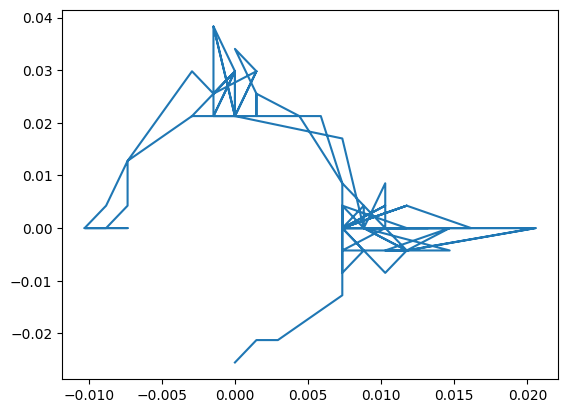

In [33]:

import matplotlib.pyplot as plt

plt.plot(*zip(*anvil_data_temp))
plt.show()

In [143]:
tf.config.list_physical_devices('GPU')

[]

In [142]:
nvidia-smi

NameError: name 'nvidia' is not defined

In [ ]:
""